In [23]:
#!pip install pandas-profiling sklearn

In [91]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

ImportError: No module named 'pandas_profiling'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(na_values='?',filepath_or_buffer='./adult1.csv')

In [13]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [ ]:
data.profile_report(style={'full_width':True},correlations={'phi_k':True,'cramers':False,'pearson':False,'spearman':False,'kendall':False,'recoded':False})

## Observations
- Dataset has 24 duplicate rows, - which has to be removed

- `native.country` (Categorical) has 583 (1.8%) missing values 
    - *This will be replaced with ode value, as mentioned in the Assignment statement*

- `occupation` (Categorical) has 1843 (5.7%) missing values
    - *This will be replaced with mode value, as mentioned in the Assignment statement*
    - *Top 3 values frequencies are 12.7%, 12.6% and 12.5% , which are so close, so replacing 5.7% (1843) missing values with Mode value should be double checked. Still we will stick to the assignment statement*

- `workclass` has 1836 (5.6%) missing values
    - *This will be replaced with mode value, as mentioned in the Assignment statement*
    



## Pre-Processing

#### Removing Duplicates

In [ ]:
#code to remove dupicates from data
data = data.drop_duplicates()

#### Replacing Missing Values (with Mode)
- `native.country`
- `occupation`
- `workclass`

In [17]:
data['native.country'] = data['native.country'].fillna(data['native.country'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])

For doing Bivariate analysis followed below link
https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

### 1.Age 
- Let it be continious varibale for now, we can change it to bins later

In [18]:
sns.boxplot(x='income',y='age', data=data)
plt.show()

NameError: name 'sns' is not defined

https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas

In [ ]:
sns.FacetGrid(data,hue='income',size=7).map(sns.distplot,'age').add_legend()

In [25]:
data.groupby(['workclass', 'income']).count()['age'].plot.bar(stacked=True)

### 2. Workclass 
- `Without-pay` , `Never-worked` did not even present in 1% of data set hence marking it as others - this class 100% falls under <=50K category of income
- One-Hot encoding

In [26]:
data['workclass'] = data['workclass'].replace(['Without-pay','Never-worked' ] , ['others','others'])

#doing onehot encoding 
column_name='workclass'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 3.Fnlwgt
- Normalizing it 

In [27]:
data.groupby('income').fnlwgt.plot(kind='kde')

income
<=50K    Axes(0.125,0.125;0.775x0.775)
>50K     Axes(0.125,0.125;0.775x0.775)
Name: fnlwgt, dtype: object

With info from abouve graph and from Profiling report 
- we will normalize this column data from -1 to 1

In [28]:
#mean_val=data["fnlwgt"].mean()
#std_val=data["fnlwgt"].std()

min_val=data["fnlwgt"].min()
max_val=data["fnlwgt"].max()

data["fnlwgt"]=((data["fnlwgt"]-min_val)/(max_val-min_val))
#data["fnlwgt"]=((data["fnlwgt"]-mean_val)/std_val)

#### 4. Education


In [29]:
data.groupby(['education', 'income']).count()['age'].plot.bar(stacked=True)

In [30]:
data['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [31]:
data['education'] = data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','Assoc-acdm','Assoc-voc' ] 
                , ['below_high_school','below_high_school','below_high_school','below_high_school','below_high_school','below_high_school','above_high_school','above_high_school','Assoc','Assoc'])

#doing onehot encoding 
column_name='education'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 5. Education.num
- droping it as its covered in education column. Verified with `Phik` Correlations graph in profiling 

In [32]:
data.drop('education.num', axis=1, inplace=True)

### 6.marital.status

In [33]:
data.groupby(['marital.status', 'income']).count()['age'].plot.bar(stacked=True)

In [34]:
data['marital.status'] = data['marital.status'].replace(['Married-spouse-absent','Married-AF-spouse' ] , ['Married-xx','Married-xx'])

#doing onehot encoding 
column_name='marital.status'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 7.occupation

In [35]:
data.groupby(['occupation', 'income']).count()['age'].plot.bar(stacked=True)

In [36]:
data.occupation.value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [37]:
data['occupation'] = data['occupation'].replace(['Armed-Forces','Priv-house-serv','Protective-serv' ] , ['Other-service','Other-service','Other-service'])

#doing onehot encoding
column_name='occupation'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 8. relationship

In [38]:
data.groupby(['relationship', 'income']).count()['age'].plot.bar(stacked=True)

In [39]:

#doing onehot encoding
column_name='relationship'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 9. race

In [40]:
data.groupby(['race', 'income']).count()['age'].plot.bar(stacked=True)

In [41]:

#doing onehot encoding
column_name='race'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 10. sex

In [42]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

### 11. capital.gain

Seems data is too much skewed, from the stats shown in profiling 
<br>
Hence converting it in to categorical Zero, Low, Medium, High, UltraHigh

In [ ]:
sns.FacetGrid(data,hue='income',size=7).map(sns.distplot,'capital.gain').add_legend()

In [43]:
bins = [-1,0, 5000, 10000, 20000, 150000]
labels =['Zero','Low','Medium','High','UltraHigh']    # 
data['capital.gain']=pd.cut(data['capital.gain'], bins,labels=labels)

In [44]:
data.groupby(['capital.gain', 'income']).count()['age'].plot.bar(stacked=True)

In [45]:
#doing onehot encoding
column_name='capital.gain'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 12. capital.loss

Seems data is too much skewed, from the stats shown in profiling 
<br>
Hence converting it in to categorical Zero, Low, Medium, High, UltraHigh

In [ ]:
sns.FacetGrid(data,hue='income',size=7).map(sns.distplot,'capital.loss').add_legend()

In [46]:
bins = [-1,0, 1000, 2000, 3000, 5000]
labels =['Zero','Low','Medium','High','UltraHigh']    # 
data['capital.loss']=pd.cut(data['capital.loss'], bins,labels=labels)

In [47]:
data.groupby(['capital.loss', 'income']).count()['age'].plot.bar(stacked=True)

In [48]:
#doing onehot encoding
column_name='capital.loss'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 13. Hours.per.week

In [49]:
sns.FacetGrid(data,hue='income',size=7).map(sns.distplot,'hours.per.week').add_legend()

NameError: name 'sns' is not defined

In [50]:
bins = [0,20, 35, 45, 60, 100]
labels =['Low','Medium','Normal','Overtime','owl']    # 
data['hours.per.week']=pd.cut(data['hours.per.week'], bins,labels=labels)

In [51]:
data.groupby(['hours.per.week', 'income']).count()['age'].plot.bar(stacked=True)

In [52]:
#doing onehot encoding
column_name='hours.per.week'
data=pd.concat([data,pd.get_dummies(data[column_name],prefix=column_name)],axis=1).drop([column_name],axis=1)

### 14. native.country

There are 42 unique values, of which 40 countries does not have 1% representaion. 
<br>
So keeping this study as US and NON-US study, making this variable as binary


In [53]:
data.groupby(['native.country']).count()['age'].plot.bar(stacked=True)

In [55]:
data['native.country'][data['native.country'] != 'United-States']=0
data['native.country'][data['native.country'] == 'United-States']=1 


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
data.groupby(['native.country', 'income']).count()['age'].plot.bar(stacked=True)

### 15. Replace income variable with 1 or 0 

In [57]:
data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})

In [58]:
data

,age,fnlwgt,sex,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,capital.loss_Zero,capital.loss_Low,capital.loss_Medium,capital.loss_High,capital.loss_UltraHigh,hours.per.week_Low,hours.per.week_Medium,hours.per.week_Normal,hours.per.week_Overtime,hours.per.week_owl
0,90,0.043987,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,82,0.081896,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,66,0.118021,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,54,0.086982,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,41,0.171404,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
5,34,0.138941,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
6,38,0.093938,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
7,74,0.051855,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8,68,0.278268,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,41,0.039223,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


### Preprocessing steps are verified  
 - Row number before and after duplicate removal - Also with Data Profiling after pre-processing
 - Mode replace - with row indexed 0 and 2

### Extract X and Y colummns

In [59]:
label_col = data['income'] 
feature_col = data.drop(['income'],axis=1)

### Test Train Split - startified


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(feature_col, label_col,
                                                    test_size=0.20,
                                                    random_state=91,
                                                    stratify=label_col)

### Gaussian NB

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.7867342238599724


### Multinomial NB

In [65]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred=mnb.predict(x_test)

In [66]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.8252725318593582


In [73]:
# examine the class distribution of the testing set
y_test.value_counts()

0    4945
1    1568
Name: income, dtype: int64

### Confusion Matrix
##### First argument is true values, second argument is predicted values
##### this produces a 2x2 numpy array (matrix)

In [71]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[4172  773]
 [ 365 1203]]


##### True Positives (TP): we correctly predicted that 1203
##### True Negatives (TN): we correctly predicted that 4172
##### False Positives (FP): we incorrectly predicted that 773 (a Type I error)
##### False Negatives (FN): we incorrectly predicted 365 (a Type II error)


In [75]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred[0:25])

True [0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0]
Pred [0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0]


In [77]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[4172  773]
 [ 365 1203]]


 ##### Metrics computed from a confusion matrix
 ##### Classification Accuracy: Overall, how often is the classifier correct?

In [79]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8252725318593582
0.8252725318593582


##### Classification Error: Overall, how often is the classifier incorrect

##### Also known as "Misclassification Rate"

In [80]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.1747274681406418
0.17472746814064177


### Sensitivity: 
##### When the actual value is positive, how often is the prediction correct

In [82]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.767219387755102
0.767219387755102


### Specificity: 
##### When the actual value is negative, how often is the prediction correct

In [83]:
specificity = TN / (TN + FP)

print(specificity)

0.843680485338726


##### False Positive Rate: When the actual value is negative, how often is the prediction incorrect

In [84]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.156319514661274
0.15631951466127403


##### Precision: When a positive value is predicted, how often is the prediction correct

In [87]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.6088056680161943
0.6088056680161943


### Receiver Operating Characteristic (ROC) Curves

##### ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for particular context


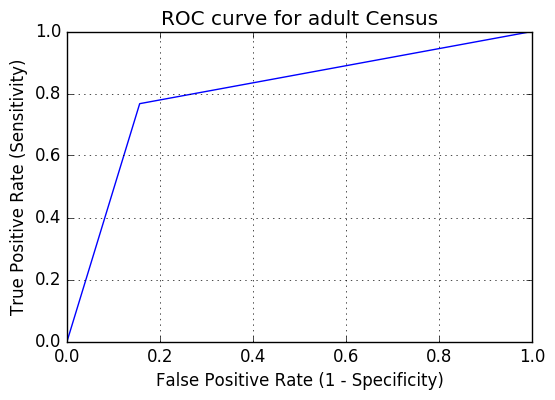

In [96]:
# First argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for adult Census')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [97]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [98]:
evaluate_threshold(0.5)

Sensitivity: 0.767219387755102
Specificity: 0.843680485338726


In [99]:
evaluate_threshold(0.3)

Sensitivity: 0.767219387755102
Specificity: 0.843680485338726


### AUC

#### AUC is the percentage of the ROC plot that is underneath the curve
#### AUC is useful as a single number summary of classifier performance
#### Higher value = better classifier
#### If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation
#### AUC is useful even when there is high class imbalance (unlike classification accuracy)
#### Fraud case
#### Null accuracy almost 99%


In [101]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred))

0.805449936546914


In [108]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()
cross_val_score(logreg, feature_col, label_col, cv=10, scoring='roc_auc').mean()

C:\Users\admin\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: Futur

0.842032358279098